In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Yucatan Peninsula Hurricanes
week 4 - discussion section
- Practice breaking down a question into accessible data wrangling steps
- Choose appropriate packages and methods to carry out your analysis
- Practice finding additional guidance online to carry out your data wrangling plans

![Yucatan Peninsula](https://meds-eds-220.github.io/MEDS-eds-220-course/discussion-sections/images/hurricane-mitch.jpg)

In [3]:
# Load data
hurricane = pd.read_csv('https://portal.edirepository.org/nis/dataviewer?packageid=knb-lter-hfr.71.23&entityid=ab0fe2bf4f3ad850371ccb9c69d78469')

## brainstorm
How many hurricanes with Saffir-Simpson category 5 have been registered and what was their duration? 

In [4]:
hurricane.dtypes
hurricane

,code,start.date,end.date,number,name,ss,track,rf.max
0,Y1852,1852-10-07,1852-10-08,5,NaN,2,O,F1
1,Y1857,1857-09-28,1857-09-28,4,NaN,2,N,F1
2,Y1861,1861-08-17,1861-08-17,2,NaN,1,O,Nd
3,Y1864,1864-08-31,1864-08-31,3,NaN,1,S,F1
4,Y1865,1865-09-11,1865-09-11,4,NaN,2,O,F1
...,...,...,...,...,...,...,...,...
100,Y1995a,1995-10-01,1995-10-03,15,Opal,1,N*,F0
101,Y1995b,1995-10-10,1995-10-16,17,Roxanne,3,N,F2
102,Y1996,1996-08-20,1996-08-20,4,Dolly,1,N,F1
103,Y1998,1998-10-27,1998-10-28,13,Mitch,5,S,F1


In [5]:
# Converst DATE column to timestamps
pd.to_datetime(hurricane['start.date'])
pd.to_datetime(hurricane['end.date'])

0     1852-10-08
1     1857-09-28
2     1861-08-17
3     1864-08-31
4     1865-09-11
         ...    
100   1995-10-03
101   1995-10-16
102   1996-08-20
103   1998-10-28
104   2000-10-03
Name: end.date, Length: 105, dtype: datetime64[ns]

In [6]:
# select category 5 class
hurricane_5 = hurricane[hurricane['ss'] == 5].copy()


In [7]:
hurricane_5

,code,start.date,end.date,number,name,ss,track,rf.max
76,Y1955b,1955-09-28,1955-09-28,10,Janet,5,N,F3
96,Y1980a,1980-08-07,1980-08-08,1,Allen,5,O,F3
98,Y1988,1988-09-14,1988-09-15,8,Gilbert,5,N,F3
103,Y1998,1998-10-27,1998-10-28,13,Mitch,5,S,F1


In [8]:
(hurricane.loc[hurricane['ss']==5]
     .assign(duration = pd.to_datetime(hurricane['end.date'])-pd.to_datetime(hurricane['start.date'])))[['name','ss','duration']]

,name,ss,duration
76,Janet,5,0 days
96,Allen,5,1 days
98,Gilbert,5,1 days
103,Mitch,5,1 days


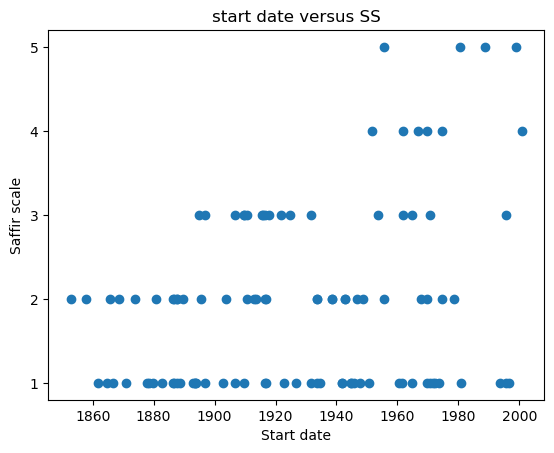

In [9]:
plt.figure()
plt.scatter(pd.to_datetime(hurricane['start.date']),hurricane['ss'])
plt.title("start date versus SS")
plt.xlabel('Start date')
plt.ylabel('Saffir scale')

plt.yticks([1,2,3,4,5])
plt.show()